In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#import data 
training_data=pd.read_csv("train.csv") 


In [3]:
#Explore data info
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#location by condition
training_data.loc[(training_data.Sex=="male") & (training_data.Survived==1) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [5]:
#description of the data
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Count'>

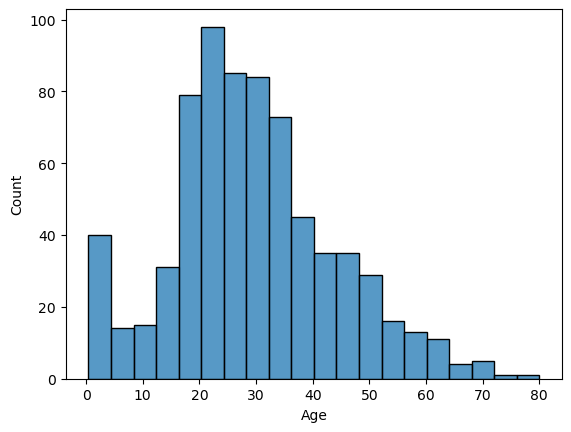

In [6]:
#Data visualization
b=np.histogram_bin_edges(training_data[training_data.Age.notnull()].Age, bins=20, range=None, weights=None)
sns.histplot(training_data.Age,bins=b)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

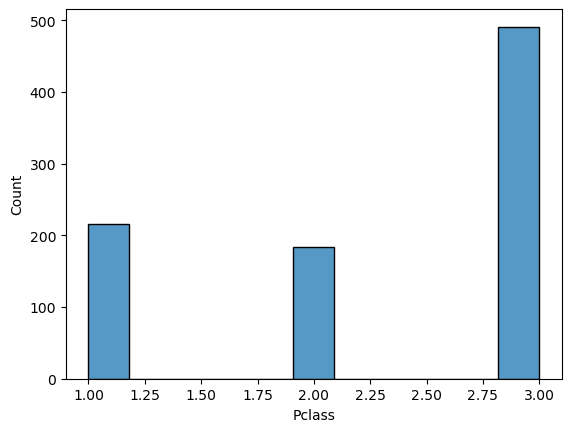

In [7]:
sns.histplot(training_data.Pclass)

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

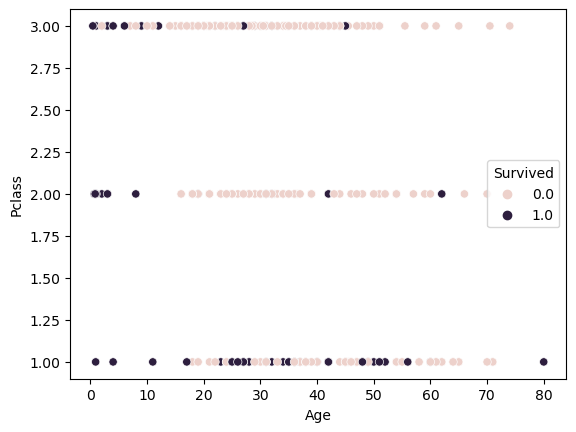

In [8]:
sns.scatterplot(x=training_data['Age'], y=training_data['Pclass'], hue=training_data[training_data.Sex=='male'].Survived)

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

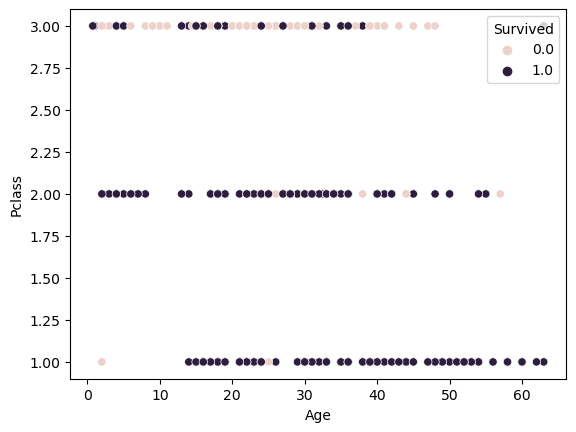

In [9]:
sns.scatterplot(x=training_data['Age'], y=training_data['Pclass'], hue=training_data[training_data.Sex=='female'].Survived)

In [10]:
#Looking for correlations  
correlation_matrix = training_data.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
training_data[training_data.Survived==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [12]:
training_data[training_data.Age.notnull()].Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [13]:
#Create new df with usefull columns (i.e. Features). Drop PassengerId Name Ticket Cabin

td=training_data.loc[:, ['Pclass', 'Sex', 'Age','SibSp','Parch','Fare','Embarked']]
td.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [14]:
#Converting features to numerical values 
#Sex : male=0 female=1
td.loc[td.loc[td.Sex=='male'].index,"Sex"]=0
td.loc[td.loc[td.Sex=='female'].index,"Sex"]=1
#Embarked :  S=0 C=1 Q=2
td.loc[td.loc[td.Embarked=='S'].index,"Embarked"]=0
td.loc[td.loc[td.Embarked=='C'].index,"Embarked"]=1
td.loc[td.loc[td.Embarked=='Q'].index,"Embarked"]=2
td.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [15]:
#Usefull functions
td.Embarked.value_counts()
td.Embarked.mean()

#completing missing values with the means (Age and Embarked) 
td.loc[td.loc[td.Embarked.isnull()].index,"Embarked"]=td.Embarked.mean()
td.loc[td.loc[td.Age.isnull()].index,"Age"]=td.Age.mean()
td.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [16]:
#Changing data type to float64
td=td.astype('float64',copy=False)
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(7)
memory usage: 48.9 KB


In [17]:
#displaying data description :mean std max ...
td.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635442
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [18]:
#Mean normalization
td=(td-td.mean())/(td.std())
td.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.826913,-0.737281,-0.592148,0.432550,-0.473408,-0.502163,-0.570004
1,-1.565228,1.354813,0.638430,0.432550,-0.473408,0.786404,1.003703
2,0.826913,1.354813,-0.284503,-0.474279,-0.473408,-0.488580,-0.570004
3,-1.565228,1.354813,0.407697,0.432550,-0.473408,0.420494,-0.570004
4,0.826913,-0.737281,0.407697,-0.474279,-0.473408,-0.486064,-0.570004


In [19]:
#adding  output value to the last column of df
td['Survived']=training_data['Survived']
td.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,0.826913,-0.737281,-0.592148,0.432550,-0.473408,-0.502163,-0.570004,0
1,-1.565228,1.354813,0.638430,0.432550,-0.473408,0.786404,1.003703,1
2,0.826913,1.354813,-0.284503,-0.474279,-0.473408,-0.488580,-0.570004,1
3,-1.565228,1.354813,0.407697,0.432550,-0.473408,0.420494,-0.570004,1
4,0.826913,-0.737281,0.407697,-0.474279,-0.473408,-0.486064,-0.570004,0


In [20]:
#Linear regression :
X=td.drop('Survived', inplace=False, axis=1)#.to_numpy()
Y=td['Survived']#.to_numpy()

In [29]:
#shuffling and spliting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.05, random_state= 42)

In [30]:
#check the shape
print(X_train)

       Pclass       Sex           Age     SibSp     Parch      Fare  Embarked
86   0.826913 -0.737281 -1.053615e+00  0.432550  3.248412  0.043684 -0.570004
67   0.826913 -0.737281 -8.228815e-01 -0.474279 -0.473408 -0.483885 -0.570004
350  0.826913 -0.737281 -5.152369e-01 -0.474279 -0.473408 -0.462419 -0.570004
210  0.826913 -0.737281 -4.383257e-01 -0.474279 -0.473408 -0.506188 -0.570004
659 -1.565228 -0.737281  2.176654e+00 -0.474279  2.007806  1.631419  1.003703
..        ...       ...           ...       ...       ...       ...       ...
106  0.826913  1.354813 -6.690592e-01 -0.474279 -0.473408 -0.494114 -0.570004
270 -1.565228 -0.737281  4.371893e-15 -0.474279 -0.473408 -0.024233 -0.570004
860  0.826913 -0.737281  8.691639e-01  1.339380 -0.473408 -0.364151 -0.570004
435 -1.565228  1.354813 -1.207437e+00  0.432550  2.007806  1.766749 -0.570004
102 -1.565228 -0.737281 -6.690592e-01 -0.474279  0.767199  0.907228 -0.570004

[846 rows x 7 columns]


In [57]:
#First Model
Mod=LogisticRegression(penalty='l2',C=1,solver='sag', max_iter=100).fit(X_train, Y_train)

In [58]:
#1st test

Y_test_pred=Mod.predict(X_test)
print("Prediction on test set:", Y_test_pred)

Y_train_pred=Mod.predict(X_train)


Prediction on test set: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0]


In [59]:
#accuracy on test and trraining sets:
#accuracy_score(Y_train, Y_train_pred)
accuracy_score(Y_test, Y_test_pred)

0.8002364066193853